# Assignment 1: k-Nearest Neighbors
### ip222gs

## Exercise 4: k-NN Classification using scikit-learn

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['pcolor.shading'] ='nearest'

### Task 1. Plot the original microchip data using different markers for the two classes OK and Fail.

In [2]:
# read csv and save output as numpy array
df = np.loadtxt('microchips.csv', delimiter=',')

In [3]:
# split features and target
X = df[:, :2]
y = df[:, 2]

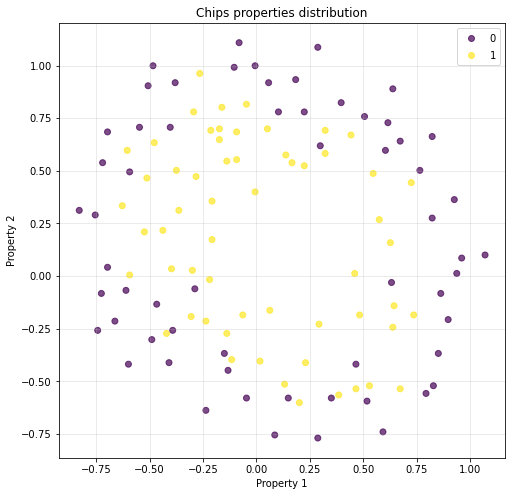

In [4]:
plt.figure(figsize=(8,8))
# ax = plt.scatter(x=df[:, 0], y=df[:, 1], c= df[:, 2], alpha=0.7)
ax = plt.scatter(x=X[:, 0], y=X[:, 1], c= y, alpha=0.7)
plt.title('Chips properties distribution')
plt.xlabel('Property 1')
plt.ylabel('Property 2')
plt.grid(True)

legend = ax.legend_elements() # https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html
plt.legend(*legend)

plt.show()

### Task 2. Implement and use k-NN to predict whether three unknown microchips are likely to be OK or Fail.

In [5]:
# function to define KNeighborsClassifier

def knn_class_sclearn(kneigh):
    global X, y
    return neighbors.KNeighborsClassifier(n_neighbors=kneigh).fit(X, y)

In [6]:
# defining values for unknowing chips
chip_1 = np.array([-0.3, 1.0]).reshape(1, -1)
chip_2 = np.array([-0.5, -0.1]).reshape(1, -1)
chip_3 = np.array([0.6, 0.0]).reshape(1, -1)

In [7]:
# additional condition for ease of print
def ok_fail(chip, kneigh ):
    if knn_class_sclearn(kneigh).predict(chip)[0] == 1:
        return 'OK'
    else:
        return 'Fail'

In [8]:
# print the result of predictions for  different k values
for k in (1, 3, 5, 7):
    print(f'k = {k}')
    print(f'chip1: {chip_1[0]} ==> {ok_fail(chip_1, k)}')
    print(f'chip2: {chip_2[0]} ==> {ok_fail(chip_2, k)}')
    print(f'chip3: {chip_3[0]} ==> {ok_fail(chip_3, k)}')
    print()

k = 1
chip1: [-0.3  1. ] ==> OK
chip2: [-0.5 -0.1] ==> Fail
chip3: [0.6 0. ] ==> Fail

k = 3
chip1: [-0.3  1. ] ==> Fail
chip2: [-0.5 -0.1] ==> Fail
chip3: [0.6 0. ] ==> OK

k = 5
chip1: [-0.3  1. ] ==> Fail
chip2: [-0.5 -0.1] ==> OK
chip3: [0.6 0. ] ==> OK

k = 7
chip1: [-0.3  1. ] ==> Fail
chip2: [-0.5 -0.1] ==> Fail
chip3: [0.6 0. ] ==> OK



### Task 3. Display a 2 x 2 plot showing the k-NN regression result and the MSE training error for k = 1, 3, 5, 7

In [9]:
# apply function to calculate predicated class based on actual  values and k number of neighbours
y_pred_sclearn_1 = knn_class_sclearn(1).predict(X)
y_pred_sclearn_3 = knn_class_sclearn(3).predict(X)
y_pred_sclearn_5 = knn_class_sclearn(5).predict(X)
y_pred_sclearn_7 = knn_class_sclearn(7).predict(X)

In [10]:
# function to calculate number of training errors
def training_error(y_act, y_pred):
    return sum(y_act[i] != y_pred[i] for i in range(len(y_act)))

Use the approach presented in https://github.com/rafaelmessias/2dv516/blob/master/2dv516-python-example-decision-boundaries.ipynb and https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html

In [11]:
# define main grid and color settings
grid_size = 100

min_x, max_x = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
min_y, max_y = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_axis = np.linspace(min_x, max_x, grid_size)
y_axis = np.linspace(min_y, max_y, grid_size)

xx, yy = np.meshgrid(x_axis, y_axis)

cells = np.stack([xx.ravel(), yy.ravel()], axis=1)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])

In [12]:
# define color grid based on k value

grid_1 = knn_class_sclearn(1).predict(cells).reshape(grid_size, grid_size)
grid_3 = knn_class_sclearn(3).predict(cells).reshape(grid_size, grid_size)
grid_5 = knn_class_sclearn(5).predict(cells).reshape(grid_size, grid_size)
grid_7 = knn_class_sclearn(7).predict(cells).reshape(grid_size, grid_size)

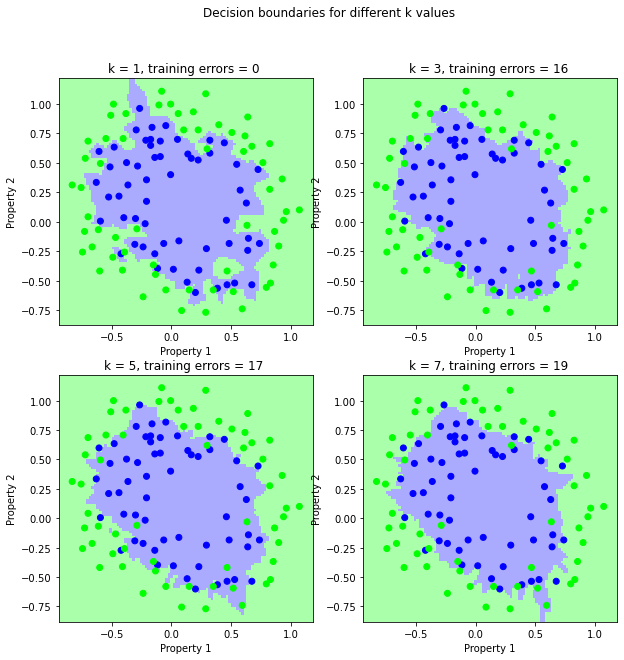

In [13]:
# print plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Decision boundaries for different k values')

ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

ax1.pcolormesh(x_axis, y_axis, grid_1, cmap=cmap_light)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax1.set_title(f'k = 1, training errors = {training_error(y, y_pred_sclearn_1)} ')

ax2.pcolormesh(x_axis, y_axis, grid_3, cmap=cmap_light)
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax2.set_title(f'k = 3, training errors = {training_error(y, y_pred_sclearn_3)} ')

ax3.pcolormesh(x_axis, y_axis, grid_5, cmap=cmap_light)
ax3.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax3.set_title(f'k = 5, training errors = {training_error(y, y_pred_sclearn_5)} ')

ax4.pcolormesh(x_axis, y_axis, grid_7, cmap=cmap_light)
ax4.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
ax4.set_title(f'k = 7, training errors = {training_error(y, y_pred_sclearn_7)} ')

for ax in axs.flat:
    ax.set(xlabel='Property 1', ylabel='Property 2')

plt.show()

Presented graph shows the same training erros as received  by using a knn function created from scrath. Hemce we can confirm that algoritm presented in task 1 is perfroming as requested